In [2]:
# In Class Lab 6
# Surface Brightness Profiles


In [3]:
# Add path to other HW folders / Modular Design
import sys
sys.path.append("../../Homeworks")

# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from Homework2.ReadFile import Read
from Homework4.CenterOfMass import CenterOfMass
from Homework5.MassProfile import MassProfile

# Lab 6: Sersic Profiles

In this lab we will use Homework 5 solutions to compute the mass profile of the Milky Way's bulge. 
We will turn the mass profile into a density profile and see if we can fit it reasonably well 
with a sersic profile. 

# Part A : 

Create a function called `SersicE` that returns the Sersic Profile in terms of the effective radius $R_e$ (i.e. the half light radius).

$I(r) = I_e exp^{-7.67 ( (r/R_e)^{1/n} - 1)}$

Where 

$ L = 7.2 I_e \pi R_e^2$

and  $R_e$ is the half light radius.  We will assume a mass to light ratio for the stellar bulge of 1, so this is also the half mass radius.

The function should take as input: the radius, $R_e$, $n$ and the total stellar mass of the system.


In [4]:
def SersicE(R, Re, n, Mtot):
    """
    :param R: array of radii (kpc)
    :param Re: half mass radius (kpc)
    :param n: the sersic index
    :param Mtot: total stellar mass (Msun)
    
    :return: Surface brightness profiel (Lsun/kpc^2)
    """
    # Assuming the M/L = 1
    # Total luminiosity = total stellar mass
    L = Mtot
    
    Ie = L / (7.2*np.pi * Re**2)
    A = (R/Re)**(1/n) - 1
    return Ie * np.exp(-7.67 * A)

# Part B

a) Create an instance of the MassProfile Class for the MW. Store it as a variable `MW`. 

In [5]:
MassProfile?

Init signature: MassProfile(galaxy, snap)
Docstring:     
:param galaxy: a Galaxy name, e.g. "MW", "M31" or "M33"
:param snap: snapshot number, e.g. 0, 1, etc
Init docstring:
        
        
File:           ~/repos/400B_PerezChavez/Homeworks/Homework5/MassProfile.py
Type:           type
Subclasses:     


In [6]:
M31 = MassProfile('M31', 0)

b) Create an array of radii from 0.1 kpc to 30 kpc in increments of 0.1


In [7]:
R = np.arange(0.1, 30, 0.1)

c) Define a new array called `BulgeMass`, that uses the function `MassEnclosed` within MassProfile to compute the mass profile of the bulge.  Get rid of astropy units in `BulgeMass` by adding `.value` 


In [8]:
BulgeMass = M31.MassEnclosed(3, R)
BulgeMass

<Quantity [7.01841000e+06, 4.01052000e+07, 1.33349790e+08, 3.26857380e+08,
           6.64743690e+08, 1.15904028e+09, 1.80874452e+09, 2.55269598e+09,
           3.23448438e+09, 3.91125963e+09, 4.43864301e+09, 4.99410003e+09,
           5.52649656e+09, 5.97768006e+09, 6.40179255e+09, 6.79582614e+09,
           7.13972823e+09, 7.48563558e+09, 7.82853504e+09, 8.14135560e+09,
           8.42008674e+09, 8.68377843e+09, 8.92942278e+09, 9.17707239e+09,
           9.42271674e+09, 9.66936372e+09, 9.90397914e+09, 1.01446103e+10,
           1.03290943e+10, 1.05155834e+10, 1.06810174e+10, 1.08514645e+10,
           1.10309353e+10, 1.11803271e+10, 1.13016454e+10, 1.14540451e+10,
           1.15763660e+10, 1.16986868e+10, 1.18059682e+10, 1.19232760e+10,
           1.20225363e+10, 1.21418493e+10, 1.22441176e+10, 1.23293411e+10,
           1.24205804e+10, 1.25138250e+10, 1.26020565e+10, 1.26892853e+10,
           1.27855378e+10, 1.28677534e+10, 1.29359323e+10, 1.30161427e+10,
           1.30883320e+10

d) Compute the surface mass density profile for the simulated bulge and store it as an array called `BulgeI`. Assuming M/L ~ 1 this is also the surface brightness profile in Lsun/kpc^2

In [9]:
BulgeI = BulgeMass / ( 4 * np.pi * R**2 )
BulgeI

<Quantity [5.58507322e+07, 7.97867603e+07, 1.17907101e+08, 1.62565524e+08,
           2.11594488e+08, 2.56204153e+08, 2.93745542e+08, 3.17401706e+08,
           3.17768011e+08, 3.11248152e+08, 2.91914040e+08, 2.75984620e+08,
           2.60227587e+08, 2.42698298e+08, 2.26417095e+08, 2.11247915e+08,
           1.96595682e+08, 1.83854306e+08, 1.72569259e+08, 1.61967123e+08,
           1.51938597e+08, 1.42775440e+08, 1.34325309e+08, 1.26786149e+08,
           1.19973756e+08, 1.13825964e+08, 1.08111607e+08, 1.02969699e+08,
           9.77364096e+07, 9.29781713e+07, 8.84462391e+07, 8.43293073e+07,
           8.06073404e+07, 7.69638550e+07, 7.34168459e+07, 7.03305517e+07,
           6.72913027e+07, 6.44703545e+07, 6.17678568e+07, 5.93015096e+07,
           5.69139228e+07, 5.47742442e+07, 5.26963719e+07, 5.06786049e+07,
           4.88097969e+07, 4.70613684e+07, 4.53979081e+07, 4.38273107e+07,
           4.23757088e+07, 4.09593313e+07, 3.95774234e+07, 3.83059069e+07,
           3.70785464e+07

# Part C

Compute $R_e$, the half mass radius, for the bulge

In [15]:
BulgeTotal = BulgeMass.max()
BulgeTotal

<Quantity 1.7838793e+10 solMass>

In [11]:
Low = BulgeTotal/2
High = BulgeTotal / 2 + 0.01 * BulgeTotal / 2 
display(Low, High)

<Quantity 8.91939648e+09 solMass>

<Quantity 9.00859044e+09 solMass>

In [12]:
index = np.where((Low < BulgeMass) & (BulgeMass < High))
BulgeMass[index]

<Quantity [8.92942278e+09] solMass>

In [13]:
Re = R[index]

# Part D

a) Plot the surface density profile of the simulated bulge

b) Plot the Sersic profile, assuming a de Vaucouleurs Profile.

c) If the profiles don't match, try changing either $R_e$ or $n$

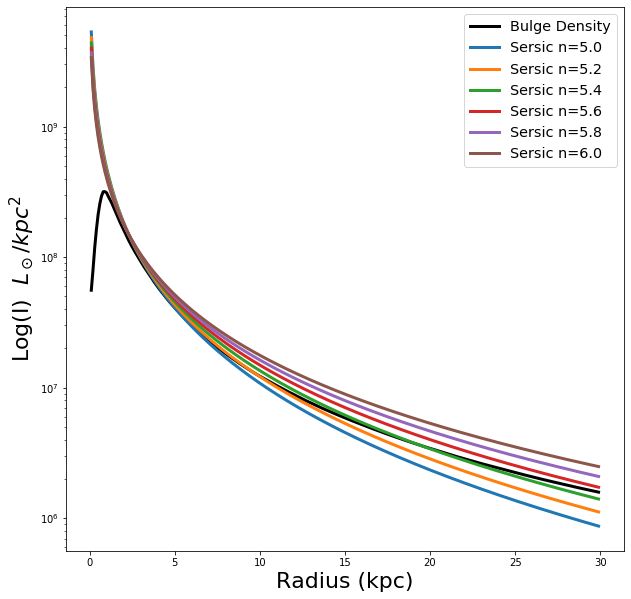

In [14]:
# Plot the Bulge density profile vs 
# the Sersic profile
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the bulge luminosity density as a proxy for surface brighntess
plt.semilogy(R,BulgeI, color='black',linewidth=3, label='Bulge Density')


# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit
# Sersic 
for n in np.linspace(5, 6, 6):
    plt.semilogy(R, SersicE(R, Re, n, BulgeTotal), lw=3., label=f'Sersic n={n}')



#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)


# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')